<a href="https://colab.research.google.com/github/Sweta-Das/DataScience-Bootcamp/blob/main/Stock_Price_Prediction_using_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('BhartiAirtel.csv', parse_dates = True, index_col = 'Date')

parse_dates parameter makes Pandas realize that the 1st col of the dataset is a date var. <br/>
index_col parameter names the column as 'Date'.

In [ ]:
df.head()

,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
Date,,,,,,,,,,,,
2021-06-04,534.80,535.75,531.25,532.70,533.229306,661985,12196,352989802.0,398176.0,60.15,4.50,-2.10
2021-06-03,531.85,533.35,528.70,532.10,531.013092,735782,15452,390709875.0,479872.0,65.22,4.65,0.25
2021-06-02,530.10,534.50,528.00,529.60,530.544324,494007,11723,262092610.0,273203.0,55.30,6.50,-0.50
2021-06-01,538.00,538.00,530.15,532.90,533.446883,501024,12404,267269691.0,232077.0,46.32,7.85,-5.10
2021-05-31,525.80,535.80,525.40,534.95,532.479380,927325,19141,493781441.0,549560.0,59.26,10.40,9.15


In [ ]:
# Getting info about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2582 entries, 2021-06-04 to 2011-01-03
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Open Price                 2582 non-null   float64
 1   High Price                 2582 non-null   float64
 2   Low Price                  2582 non-null   float64
 3   Close Price                2582 non-null   float64
 4   WAP                        2582 non-null   float64
 5   No.of Shares               2582 non-null   int64  
 6   No. of Trades              2582 non-null   int64  
 7   Total Turnover (Rs.)       2582 non-null   float64
 8   Deliverable Quantity       2581 non-null   float64
 9   % Deli. Qty to Traded Qty  2581 non-null   float64
 10  Spread High-Low            2582 non-null   float64
 11  Spread Close-Open          2582 non-null   float64
dtypes: float64(10), int64(2)
memory usage: 262.2 KB


<Axes: xlabel='Date'>

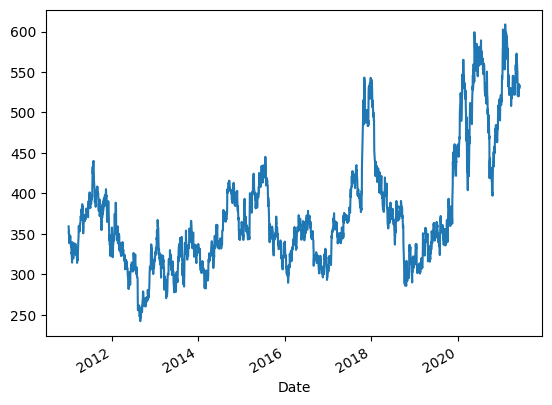

In [ ]:
# Plotting close price of dataset
df['Close Price'].plot()

In [ ]:
# Finding length of the dataset = days of data
len(df)

2582

In stock market, a year is of 250 days. So, given the result we've approx. 10 years of data.

In [ ]:
# Isolating close price for prediction
airtel_close = df['Close Price']

In [ ]:
airtel_close.head()

Date
2021-06-04    532.70
2021-06-03    532.10
2021-06-02    529.60
2021-06-01    532.90
2021-05-31    534.95
Name: Close Price, dtype: float64

In [ ]:
airtel_close.reset_index(drop = True, inplace = True)
airtel_close.shape

(2582,)

When we isolate Close Price for prediction, it'll also contain Date in it. So, we reset the index again where we drop the column of Date.

In [ ]:
airtel_close.head()

0    532.70
1    532.10
2    529.60
3    532.90
4    534.95
Name: Close Price, dtype: float64

In [ ]:
airtel_close = pd.DataFrame(airtel_close)

In [ ]:
# Train-test split
train = airtel_close.iloc[:2062]
test = airtel_close.iloc[2062:]

In [ ]:
# Scaling dataset -- good for Deep Learning Models
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
scaler.fit(train)

MinMaxScaler()

By fitting training dataset, the model learns the max & min value of the features in dataset.

In [ ]:
# Transforming the training & test set to match the scaled values
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [ ]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [ ]:
test.shape

(520, 1)

In [ ]:
# help(TimeseriesGenerator)

In [ ]:
length = 520 # length of test data
batch_size = 32

generator = TimeseriesGenerator(scaled_train, scaled_train, length = length, batch_size = batch_size)

This will create an object of train minus length size, & last 520 values will be predicted & validated

## Creating a Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, Dropout

In [ ]:
n_features = 1

In [ ]:
model = Sequential() # model

model.add(SimpleRNN(30, input_shape = (length, n_features))) # algo.

# Preventing overfitting
model.add(Dropout(rate = 0.2))

model.add(Dense(1))

# Backpropagation
model.compile(optimizer = 'adam', loss = 'mse')

30 = no. of neurons<br/>
Fully connected layer occupies most of the parameters, and hence, neurons develop co-dependency amongst each other during training that curbs the individual power of each neuron leading to overfitting of training data.

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_3 (SimpleRNN)    (None, 100)               10200     
                                                                 
 dropout_3 (Dropout)         (None, 100)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 101       
                                                                 
Total params: 10,301
Trainable params: 10,301
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit_generator(generator, epochs = 10, shuffle = False) # generally takes longer than ANN

Epoch 1/10


<ipython-input-99-969a677ddfa8>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator, epochs = 10, shuffle = False) # generally takes longer than ANN


49/49 [==============================] - 5s 73ms/step - loss: 0.1013
Epoch 2/10
49/49 [==============================] - 4s 86ms/step - loss: 0.0168
Epoch 3/10
49/49 [==============================] - 4s 78ms/step - loss: 0.0115
Epoch 4/10
49/49 [==============================] - 4s 78ms/step - loss: 0.0086
Epoch 5/10
49/49 [==============================] - 6s 125ms/step - loss: 0.0072
Epoch 6/10
49/49 [==============================] - 4s 72ms/step - loss: 0.0065
Epoch 7/10
49/49 [==============================] - 4s 73ms/step - loss: 0.0054
Epoch 8/10
49/49 [==============================] - 5s 106ms/step - loss: 0.0052
Epoch 9/10
49/49 [==============================] - 4s 78ms/step - loss: 0.0038
Epoch 10/10
49/49 [==============================] - 4s 79ms/step - loss: 0.0041


Shuffle is made false because we're working on sequential data.<br/>
We can visibly see that with each epoch, the loss gradually decreases.

<Axes: >

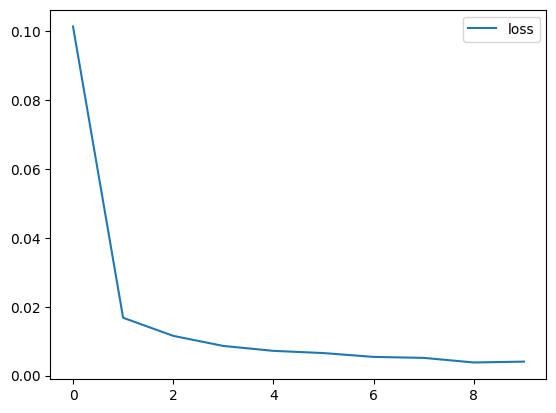

In [ ]:
# Plotting losses
losses = pd.DataFrame(model.history.history)
losses.plot()

## Evaluating Test Set

In [ ]:
# Picks last 520 values in train test
first_eval_batch = scaled_train[-length:]
first_eval_batch.shape

(520, 1)

In [ ]:
first_eval_batch = first_eval_batch.reshape(1, length, 1)

In [ ]:
first_eval_batch.shape

(1, 520, 1)

In [ ]:
# 1st prediction on 1st value of test set
model.predict(first_eval_batch)

1/1 [==============================] - 0s 271ms/step


array([[0.16649458]], dtype=float32)

In [ ]:
scaled_test[0]

array([0.21883779])

In [ ]:
# Prediction for all 520 values using for loop

test_pred = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape(1, length, n_features)

for i in range(len(test)):

  # get prediction 1 time stamp ahead ([0] is for grabbing just the no. instead of [array])
  current_pred = model.predict(current_batch)[0]

  # store prediction
  test_pred.append(current_pred)

  # update batch to now include prediction & drop 1st value
  current_batch = np.append(current_batch[:, 1:, :], [[current_pred]], axis = 1)

In [ ]:
test_pred

The given predicted values are not the true values, they are scaled values. We will transform it into its true values using Inverse Transform.

In [ ]:
true_pred = scaler.inverse_transform(test_pred)

In [ ]:
true_pred

In [ ]:
# Adding predicted true values to test set
test['predictions'] = true_pred

<ipython-input-117-2ee7fbfc7070>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['predictions'] = true_pred


In [ ]:
test

,Close Price,predictions
2062,344.65,326.950142
2063,348.90,333.092150
2064,357.60,330.893347
2065,359.60,331.803026
2066,361.00,324.456869
...,...,...
2577,338.70,376.556443
2578,353.25,178.524761
2579,349.90,376.556453
2580,355.30,178.524731


<Axes: >

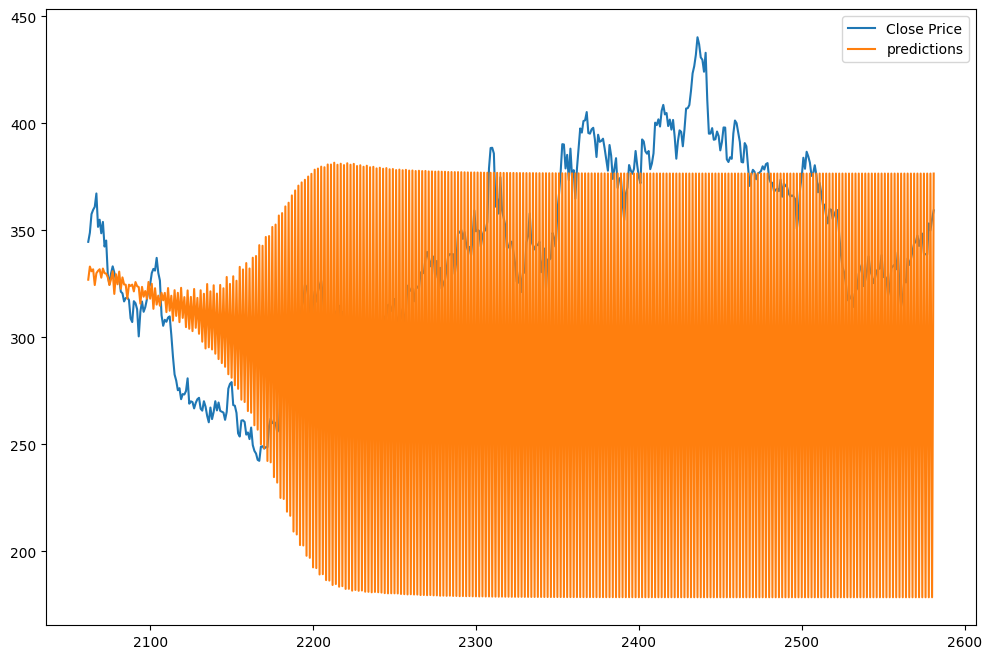

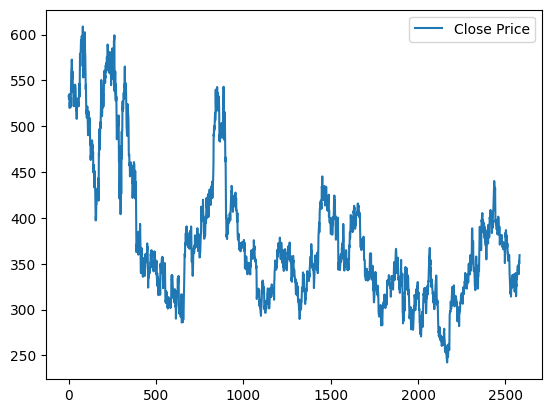

In [ ]:
test.plot(figsize = (12, 8))
airtel_close.plot()

## Creating Full Model

In [ ]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(airtel_close)

In [ ]:
generator = TimeseriesGenerator(scaled_full_data, scaled_full_data,
                                length = length, batch_size = 32)

In [ ]:
model = Sequential()

model.add(SimpleRNN(50, input_shape = (length, n_features)))

model.add(Dropout(rate = 0.2))

model.add(Dense(1))

model.compile(optimizer = 'adam', loss = 'mse')

In [ ]:
model.fit_generator(generator, epochs = 10, shuffle = False)

Epoch 1/10


<ipython-input-125-77f46aa8b408>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator, epochs = 10, shuffle = False)


65/65 [==============================] - 9s 106ms/step - loss: 0.0509
Epoch 2/10
65/65 [==============================] - 7s 103ms/step - loss: 0.0106
Epoch 3/10
65/65 [==============================] - 6s 87ms/step - loss: 0.0058
Epoch 4/10
65/65 [==============================] - 9s 139ms/step - loss: 0.0049
Epoch 5/10
65/65 [==============================] - 11s 162ms/step - loss: 0.0039
Epoch 6/10
65/65 [==============================] - 8s 123ms/step - loss: 0.0038
Epoch 7/10
65/65 [==============================] - 9s 137ms/step - loss: 0.0032
Epoch 8/10
65/65 [==============================] - 9s 138ms/step - loss: 0.0029
Epoch 9/10
65/65 [==============================] - 10s 149ms/step - loss: 0.0030
Epoch 10/10
65/65 [==============================] - 9s 133ms/step - loss: 0.0026


<Axes: >

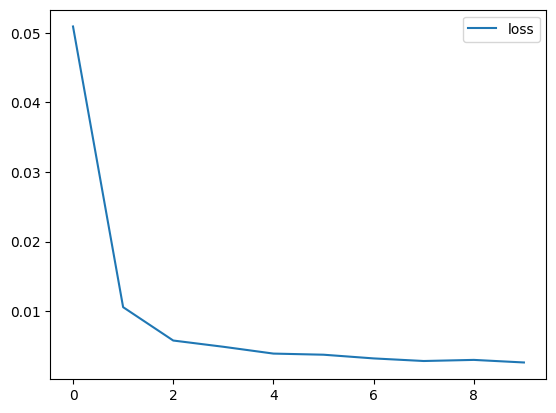

In [ ]:
full_model_losses = pd.DataFrame(model.history.history)
full_model_losses.plot()

In [ ]:
forecast = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(20):

  current_pred = model.predict(current_batch)[0]

  forecast.append(current_pred)

  current_batch = np.append(current_batch[:, 1:, :], [[current_pred]], axis = 1)

1/1 [==============================] - 0s 44ms/step


In [ ]:
forecast = scaler.inverse_transform(forecast)

In [ ]:
forecast

array([[336.10214411],
       [341.84660919],
       [341.24366308],
       [346.42055461],
       [347.70401456],
       [346.9474749 ],
       [352.25118365],
       [353.64372414],
       [359.39236137],
       [357.51280811],
       [364.5056629 ],
       [359.51422038],
       [364.6706442 ],
       [366.46632113],
       [366.64575378],
       [370.47087902],
       [368.97458907],
       [372.17823539],
       [375.70010382],
       [376.10044876]])

In [ ]:
forecast.flatten()

array([336.10214411, 341.84660919, 341.24366308, 346.42055461,
       347.70401456, 346.9474749 , 352.25118365, 353.64372414,
       359.39236137, 357.51280811, 364.5056629 , 359.51422038,
       364.6706442 , 366.46632113, 366.64575378, 370.47087902,
       368.97458907, 372.17823539, 375.70010382, 376.10044876])

In [ ]:
df_array = np.array(airtel_close)
df_array

array([[532.7 ],
       [532.1 ],
       [529.6 ],
       ...,
       [349.9 ],
       [355.3 ],
       [359.35]])

In [ ]:
full_data = pd.DataFrame(np.concatenate((df_array.flatten(), forecast.flatten())))

<Axes: >

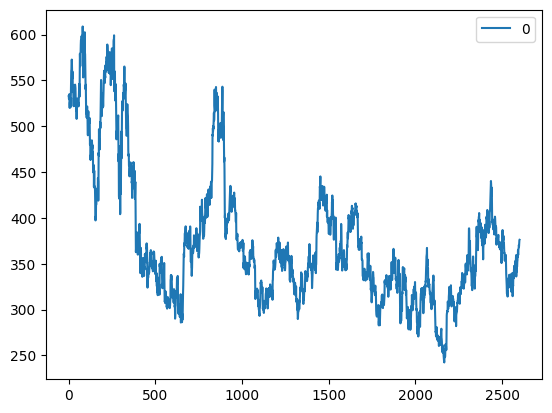

In [ ]:
full_data.plot()

The given prediction so that, next stock price can get low in future.

## LSTM Model

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor = 'val_loss', patience = 5)

This is used when we are dealing with a large dataset and we're not sure how many epochs should we assign to the model. The given code will automatically assign the epoch no. based on, when in last 2 epochs validation loss was low.

In [ ]:
length

520

In [ ]:
scaled_test.shape

(520, 1)

In [ ]:
length = 519
generator = TimeseriesGenerator(scaled_train, scaled_train, length = length,
                                batch_size = 32)

val_gen = TimeseriesGenerator(scaled_test, scaled_test, length = length,
                              batch_size = 32)

In [ ]:
model = Sequential()

model.add(LSTM(50, input_shape= (length, n_features)))

model.add(Dropout(rate = 0.2)) # dropout helps to forget here 20 % of dataset i.e. if there're 5 features then, it'll forget 1 feature

model.add(Dense(1))

model.compile(optimizer = 'adam', loss = 'mse')

In [ ]:
model.fit_generator(generator, epochs = 20, validation_data = val_gen,
                    callbacks = [early_stop], shuffle = False)

Epoch 1/20


<ipython-input-142-0ff47fd23175>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator, epochs = 20, validation_data = val_gen,


49/49 [==============================] - 14s 234ms/step - loss: 0.0117 - val_loss: 0.0021
Epoch 2/20
49/49 [==============================] - 11s 225ms/step - loss: 0.0037 - val_loss: 0.0027
Epoch 3/20
49/49 [==============================] - 11s 226ms/step - loss: 0.0026 - val_loss: 0.0020
Epoch 4/20
49/49 [==============================] - 11s 222ms/step - loss: 0.0023 - val_loss: 0.0021
Epoch 5/20
49/49 [==============================] - 11s 219ms/step - loss: 0.0021 - val_loss: 0.0019
Epoch 6/20
49/49 [==============================] - 15s 300ms/step - loss: 0.0021 - val_loss: 0.0023
Epoch 7/20
49/49 [==============================] - 15s 302ms/step - loss: 0.0020 - val_loss: 0.0023
Epoch 8/20
49/49 [==============================] - 15s 302ms/step - loss: 0.0020 - val_loss: 0.0020
Epoch 9/20
49/49 [==============================] - 10s 192ms/step - loss: 0.0019 - val_loss: 0.0019
Epoch 10/20
49/49 [==============================] - 12s 248ms/step - loss: 0.0018 - val_loss: 0.0023


We can see that the fitting stopped at 10th epoch. This is because of Early Stopping where model itself found the best possible no. of epoch required for model to train based on validation loss.

In [ ]:
losses = pd.DataFrame(model.history.history)

<Axes: >

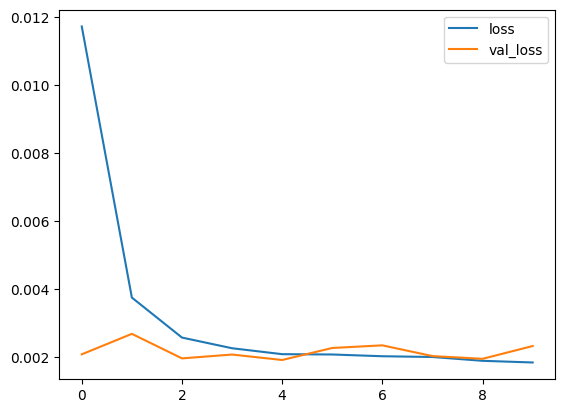

In [ ]:
losses.plot()

In [ ]:
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):

  current_pred = model.predict(current_batch)[0]

  test_predictions.append(current_pred) # storing predictions

  # updating batch to include prediction & drop 1st value
  current_batch = np.append(current_batch[:, 1:, :], [[current_pred]], axis = 1)

1/1 [==============================] - 0s 44ms/step


<ipython-input-147-6b793d9ef18e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['LSTM_predictions'] = true_predictions


<Axes: >

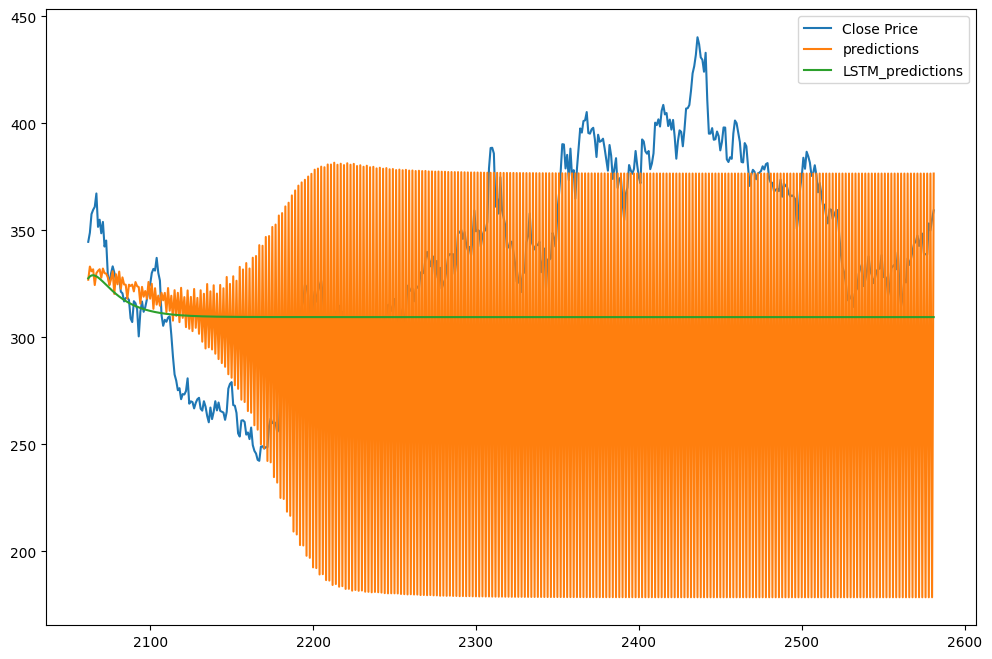

In [ ]:
true_predictions = scaler.inverse_transform(test_predictions)
test['LSTM_predictions'] = true_predictions
test.plot(figsize = (12, 8))

We can see that LSTM model is way beyond the real target. This might appear as bad prediction but, in reality, the LSTM model has picked all previous downward trend in the dataset.

## FB Prophet Model

In [ ]:
df.reset_index(inplace = True)

In [ ]:
data = df[['Date', 'Close Price']]

In [ ]:
data.head()

,Date,Close Price
0,2021-06-04,532.70
1,2021-06-03,532.10
2,2021-06-02,529.60
3,2021-06-01,532.90
4,2021-05-31,534.95


In [ ]:
data = data.rename(columns = {'Date': "ds", "Close Price": "y"}) # Renaming columns in dataset

In [ ]:
data.head()

,ds,y
0,2021-06-04,532.70
1,2021-06-03,532.10
2,2021-06-02,529.60
3,2021-06-01,532.90
4,2021-05-31,534.95


In [ ]:
!pip install fbprophet

In [ ]:
import fbprophet

In [ ]:
from fbprophet import Prophet
m = Prophet(changepoint_prior_scale = 0.15, daily_seasonality = True) # the Prophet class (model)
m.fit (data) # fitting the model using all data

In [ ]:
future = m.make_future_dataframe(periods = 21) # no. of days in future
pred = m.predict(future)
m.plot(pred)
plt.title("Prediction of the Google Stock Price using Prophet")
plt.xlabel("Date")
plt.ylabel("Close Stock Price")
plt.show()

In [ ]:
m.plot_components(pred)
plt.show()